In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# columns: Measurement date,Dose strength,Rain

lodz_df = pd.read_csv("data/lodz.csv")
gdynia_df = pd.read_csv("data/gdynia.csv")
krakow_df = pd.read_csv("data/krakow.csv")
warszawa_df = pd.read_csv("data/warszawa.csv")
lublin_df = pd.read_csv("data/lublin.csv")

In [9]:
lodz_df['Measurement date'] = pd.to_datetime(lodz_df['Measurement date'])

In [11]:
# specific_day = '2014-02-02'
# lodz_rain = lodz_df[lodz_df['Measurement date'].dt.date == pd.to_datetime(specific_day).date()].copy()
lodz_rain = lodz_df.copy()

# Create a new column 'Rain_Above_3' with initial False values
lodz_rain['Rain_Above_3'] = lodz_rain['Rain'] > 3

# Extend the True values to neighboring rows
lodz_rain['Rain_Above_3'] = lodz_rain['Rain_Above_3'] | lodz_rain['Rain_Above_3'].shift(1, fill_value=False) | lodz_rain['Rain_Above_3'].shift(-1, fill_value=False)

# Plotting
# plt.figure(figsize=(10, 6))

# # Plot all Rain values
# plt.plot(lodz_rain['Measurement date'], lodz_rain['Rain'], marker='o', linestyle='-', label='All Rain')

# # Highlight Rain values greater than 3 and their neighbors
# highlighted_df = lodz_rain[lodz_rain['Rain_Above_3']]
# plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3 or Neighbor')

# # Add horizontal line at Rain = 3
# plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

# plt.xlabel('Time')
# plt.ylabel('Rain')
# # plt.title(f'Rain Levels (Lodz - {specific_day})')
# plt.grid(True)
# plt.legend()
# plt.show()

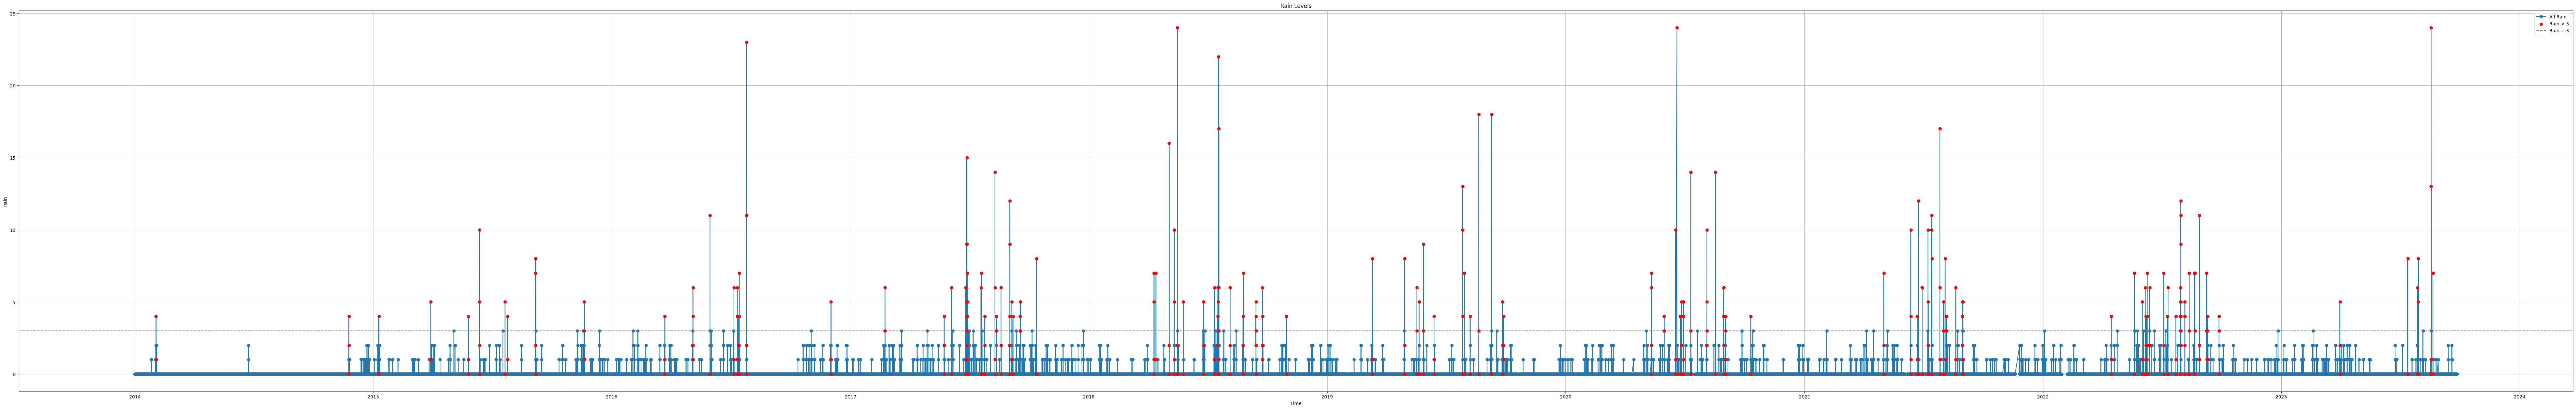

In [13]:
# Tworzenie wykresu
plt.figure(figsize=(100, 15))

# Wykres wszystkich wartości Rain
plt.plot(lodz_rain['Measurement date'], lodz_rain['Rain'], marker='o', linestyle='-', label='All Rain')

# Zaznaczenie wartości True jako czerwone punkty na wykresie
true_values = lodz_rain[lodz_rain['Rain_Above_3']]
plt.scatter(true_values['Measurement date'], true_values['Rain'], color='red', label='Rain > 3', zorder=5)

# Dodanie poziomej linii dla Rain = 3 (przerywana)
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Rain Levels')
plt.grid(True)
plt.legend()
plt.show()

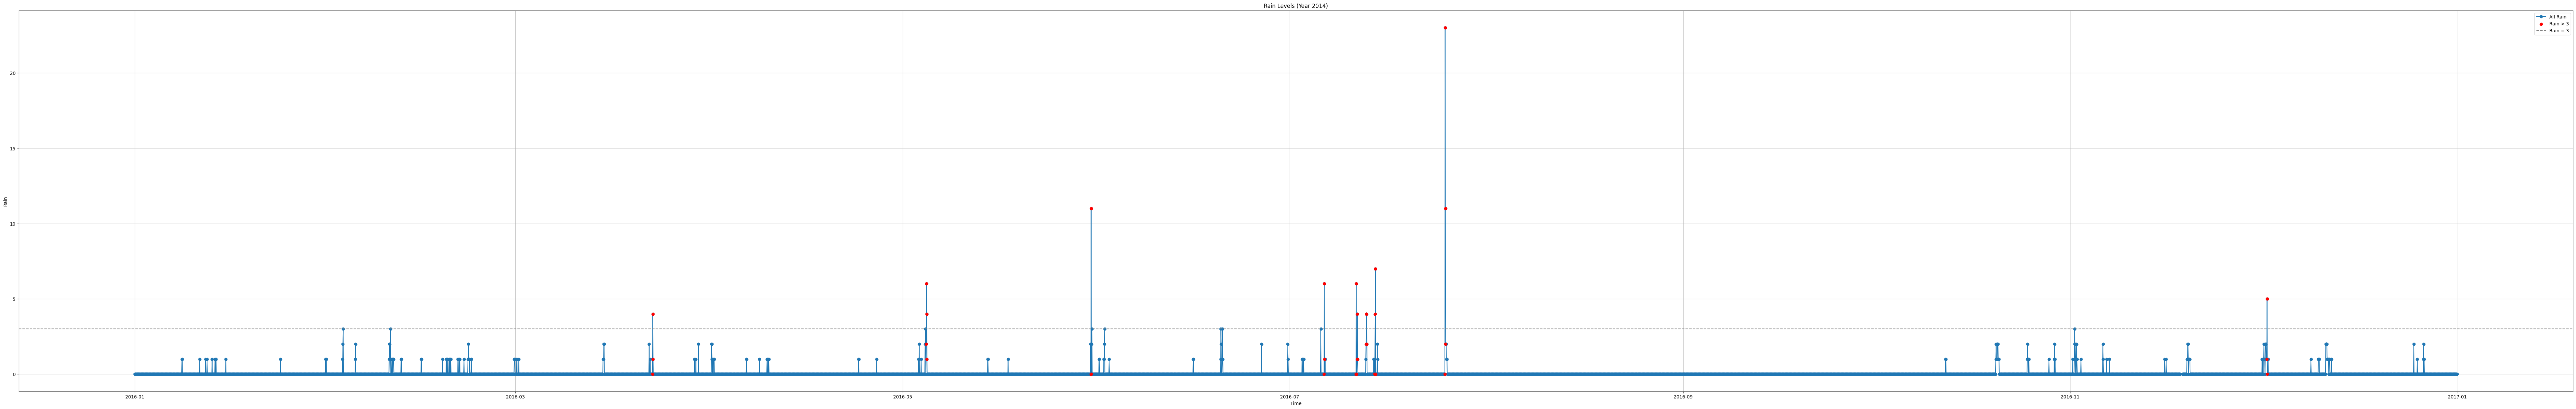

In [16]:
# Filtracja danych dla roku 2014
lodz_rain_2014 = lodz_rain[lodz_rain['Measurement date'].dt.year == 2016]

# Tworzenie wykresu
plt.figure(figsize=(100, 15))

# Wykres wszystkich wartości Rain dla roku 2014
plt.plot(lodz_rain_2014['Measurement date'], lodz_rain_2014['Rain'], marker='o', linestyle='-', label='All Rain')

# Zaznaczenie wartości True jako czerwone punkty na wykresie
true_values = lodz_rain_2014[lodz_rain_2014['Rain_Above_3']]
plt.scatter(true_values['Measurement date'], true_values['Rain'], color='red', label='Rain > 3', zorder=5)

# Dodanie poziomej linii dla Rain = 3 (przerywana)
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Rain Levels (Year 2014)')
plt.grid(True)
plt.legend()
plt.show()

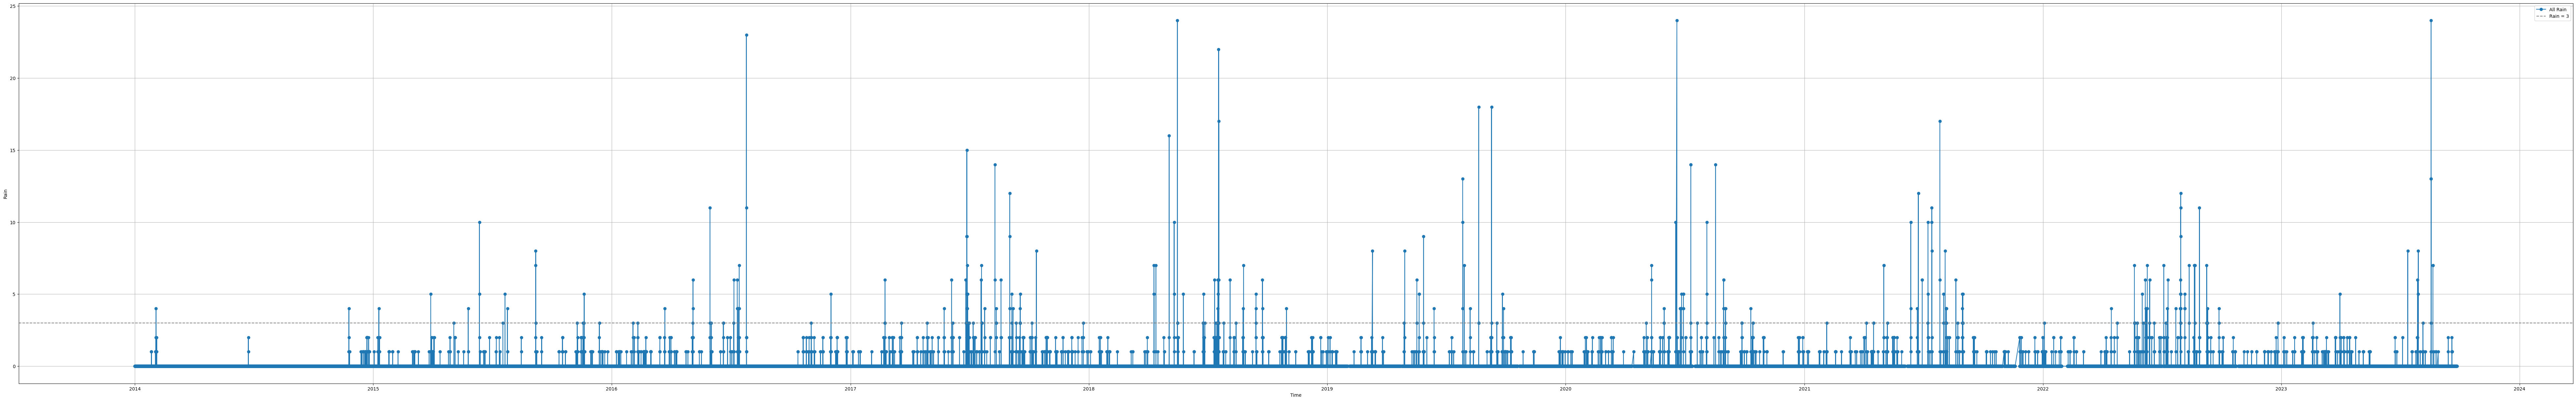

In [12]:

plt.figure(figsize=(100, 15))

plt.plot(lodz_rain['Measurement date'], lodz_rain['Rain'], marker='o', linestyle='-', label='All Rain')

# Add horizontal line at Rain = 3
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
# plt.title(f'Rain Levels (Lodz - {specific_day})')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
def process_lodz_data_daily(lodz_df):
    # Tworzenie kopii danych, aby nie modyfikować oryginalnego DataFrame'u
    lodz_df_copy = lodz_df.copy()

    # Konwersja kolumny 'Measurement date' na typ datetime
    lodz_df_copy['Measurement date'] = pd.to_datetime(lodz_df_copy['Measurement date'])

    # Sortowanie danych po dacie, jeśli nie są już posortowane
    lodz_df_copy = lodz_df_copy.sort_values(by='Measurement date')

    # Grupowanie danych co 24 godziny i znajdowanie maksymalnej wartości deszczu w oknie czasowym
    lodz_df_copy['Rain_Max_in_24H'] = lodz_df_copy.groupby(lodz_df_copy['Measurement date'].dt.date)['Rain'].transform('max')

    # Tworzenie kolumny 'Rain_Above_3' z wartościami True/False
    # Ustawienie wartości True dla rekordów, które mają Rain > 3 lub są blisko maksymalnej wartości deszczu w oknie czasowym
    lodz_df_copy['Rain_Above_3'] = (lodz_df_copy['Rain'] > 3) | (lodz_df_copy['Rain'] == lodz_df_copy['Rain_Max_in_24H'])

    return lodz_df_copy

def plot_lodz_data(lodz_df):
    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))

    # Wykres wszystkich wartości Rain
    plt.plot(lodz_df['Measurement date'], lodz_df['Rain'], marker='o', linestyle='-', label='All Rain')

    # Wykres wartości Rain większych niż 3 oraz ich sąsiadów
    highlighted_df = lodz_df[lodz_df['Rain_Above_3']]
    plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3 or Neighbor')

    # Dodanie poziomej linii dla Rain = 3
    plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

    plt.xlabel('Time')
    plt.ylabel('Rain')
    plt.title('Rain Levels')
    plt.grid(True)
    plt.legend()
    plt.show()

# Wczytywanie danych z pliku CSV dla Łodzi
lodz_df = pd.read_csv("data/lodz.csv")

# Przetwarzanie danych co 24 godziny na kopii DataFrame'u
lodz_df_processed = process_lodz_data_daily(lodz_df)

# Rysowanie wykresu na podstawie przetworzonych danych
# plot_lodz_data(lodz_df_processed)

